In [1]:
# transform our potential predictor variables into features.
# features = variables that have been transformed in ways that make them best suited to work within our model to explain variance in outcome of interest
# feature engineering is broad and complex topic

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Set the default plot aesthetics to be prettier.
sns.set_style("white")

In [3]:
# Loading the data again.

df = pd.read_csv("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv")

# Take a subset of the data to make plots clearer.
print(df.head())

print(df.cntry.unique())

  cntry  idno  year  tvtot  ppltrst  pplfair  pplhlp  happy  sclmeet  sclact  \
0    CH   5.0     6    3.0      3.0     10.0     5.0    8.0      5.0     4.0   
1    CH  25.0     6    6.0      5.0      7.0     5.0    9.0      3.0     2.0   
2    CH  26.0     6    1.0      8.0      8.0     8.0    7.0      6.0     3.0   
3    CH  28.0     6    4.0      6.0      6.0     7.0   10.0      6.0     2.0   
4    CH  29.0     6    5.0      6.0      7.0     5.0    8.0      7.0     2.0   

   gndr  agea  partner  
0   2.0  60.0      1.0  
1   2.0  59.0      1.0  
2   1.0  24.0      2.0  
3   2.0  64.0      1.0  
4   2.0  55.0      1.0  
['CH' 'CZ' 'DE' 'ES' 'NO' 'SE']


In [4]:
# FUN WITH CATEGORICAL VARIABLES
# most models will only run on numerical data
# To get info from cat var with x levels, we need to create X-1 numerical features, 
# each of which is coded 1 or 0
# While cntry var has 6 levels, only 5 features are needed to rep all the info: 
# if we know that the values for CH CZ DE ES and NO are 0 then we also know that value for SE must be 1
#Level without features is called reference value

# We could also make an indicator that gather together categories we think are related

In [5]:
# Making dummies.
# Also creating a data frame to hold our features.
features = pd.get_dummies(df['cntry'])

# Nordic countries dummy.
features['Nordic'] = np.where((df['cntry'].isin(['NO', 'SE'])), 1, 0)

print(pd.crosstab(features['Nordic'], df['cntry']))

cntry     CH    CZ  DE    ES    NO    SE
Nordic                                  
0       1546  1316  28  2426     0     0
1          0     0   0     0  1462  1816


In [6]:
# CHANGING VARIABLE TYPE
# can also take cont var and make it categorical.
# x: if we are interested in adults older than 65 to all other ages, we could make an older adult indicator feature



features['Adult_65plus'] = np.where(df['agea']>=65, 1, 0)

# Check to make sure it worked.
print(df['agea'].groupby(features['Adult_65plus']).describe())

               count       mean        std   min   25%   50%   75%    max
Adult_65plus                                                             
0             6682.0  40.874738  13.958596  15.0  29.0  42.0  53.0   64.0
1             1673.0  73.815302   6.650086  65.0  69.0  72.0  78.0  114.0


In [7]:
# THINKING LIKE A DATA SCIENTIST
# while programmer thinks in terms of strings, ints, floats, data scientist sees var as cat or cont
# categorical = nominal
# continuous = ordinal, interval, ratio

#Ordinal Variables
# indivate rank order
# ex: runners are scored 1st, 2nd, 3rd
# but ordinal var doesnt igve any info on distance between scores. 
# we know first place was faster but dont know the diff in their times
# also distance in time b/w 1st and 2nd is prob diff from 2nd and 3rd
# Treated like cat features b/c it doesnt make sense to use them in most math operatation

#Interval Variables
# indicate both rank order and distance
# temperature: distance between 30 and 40 is same b/w 70 and 80
# interval var lack an abs 0 point (temp of 0 degrees does not meant aht there is no warmth in air at all)
# the lack of abs 0 point means we cannot logically make a ratio from an interval var (60 deg is not twice as hot as 30 deg)
# Can be treated as cat or cont features (depends on how comfortable you are with assump made by most models that cont variable naturally has abs 0 point)

#Ratio Variables
# indicate rank, distance, and meaningful abs 0
# when a ratio var has score of 0, we know that none of quantity measured by var is present
# age is ratio var

In [10]:
# TLADS DRILL: Categorical or continuous (ordinal, interval, ratio)
# cntry - categorical
# year - continuous (ratio)
# idno - categorical
# tvtot - continuous (ratio)
# ppltrst - categorical
# pplfair - categorical
# pplhlp - categorical
# happy - continuous (ratio)
# sclmeet - continuous (ratio)
# sclact - continuous (ratio)
# gndr - catgorical
# agea - continuous (ratio)
# partner - categorical

In [8]:
# COMBINING TWO OR MORE HIGHLY CORRELATED VARIABLES
# many models assume that features are correlated with the outcome, but uncorrelated with eath other.
# two highly correlated var can be avg to create a feature or one can be dropped
# 3 or more highly corr var can also be combined using stat method Principal Comp Analysis PCA

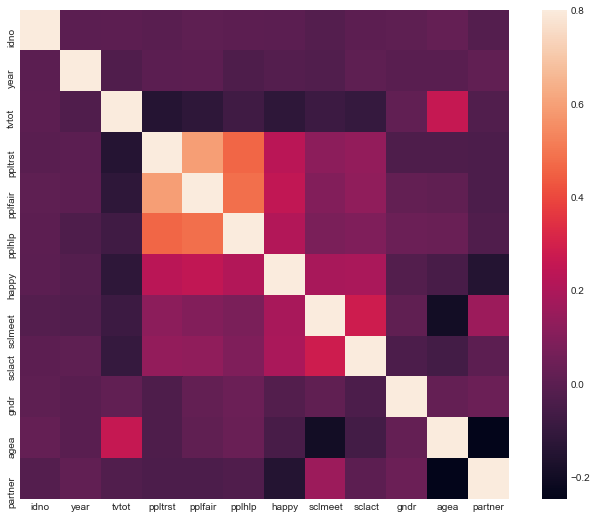

                  ppltrst   pplfair    pplhlp  trust_fair_help
ppltrst          1.000000  0.592001  0.462562         0.834209
pplfair          0.592001  1.000000  0.480918         0.841674
pplhlp           0.462562  0.480918  1.000000         0.789318
trust_fair_help  0.834209  0.841674  0.789318         1.000000


In [9]:
corrmat = df.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

# Looks like 'pplfair','ppltrst' and 'pplhlp' are pretty redundant with each
# other. Let's make some averages. Just in case some of the variables are on
# different scales than others (one ranges from 0 to 100, one ranges from 0 to
# 7, for example) we scale them before averaging by subtracting the average of
# each variable from all values in that variable, then dividing by the
# standard deviation.
means = df[['ppltrst','pplfair','pplhlp']].mean(axis=0)
stds = df[['ppltrst','pplfair','pplhlp']].std(axis=0)
features['trust_fair_help'] = ((df[['ppltrst','pplfair','pplhlp']] - means) / stds).mean(axis=1)

# Check how well the composite correlates with each of the individual variables.
plotdf = df.loc[:, ['ppltrst', 'pplfair', 'pplhlp']]
plotdf['trust_fair_help'] = features['trust_fair_help'] 
corrmat2 = plotdf.corr()

print(corrmat2)

In [11]:
# DEALING WITH NON-NORMALITY
# non norm varibles can sometimes be transformed into norm dist features using transofrmation such as taking sq root, inverse, or log of variable


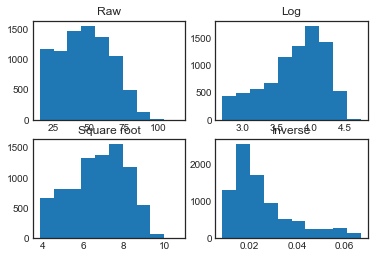

In [12]:
# Making a four-panel plot.
fig = plt.figure()

fig.add_subplot(221)
plt.hist(df['agea'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df['agea'].dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df['agea'].dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/df['agea'].dropna())
plt.title('Inverse')
plt.show()

# None of these transformations look particularly great, actually. But let's
# make a feature from the log one.

features['log_age'] = np.log(df['agea'])

In [13]:
# CREATING LINEAR RELATIONSHIPS
# many models assume that rel b/w a feature and outcome is linear
# sometimes want to include var that has non-lin comp to its rel with outcome
# to capture non-linearity while keeping the model happy, it can be helpful to create quadrats or higher level features y sq or cubing


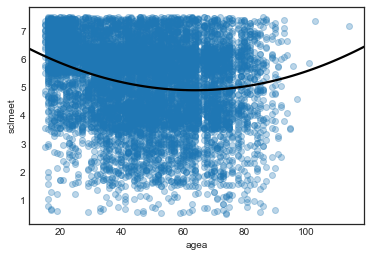

In [14]:
sns.regplot(
    df['agea'],
    y=df['sclmeet'],
    y_jitter=.49,
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()

features['age_squared'] = df['agea'] * df['agea']

In [15]:
# MAKING VARIABLES EASIER TO UNDERSTAND IN LIGHT OF RESEARCH Q
# if research q involves centimeters but var is measured in ft, you can create feature that uses cm to make model results easier to interpret
# can also reencode var into a feature that matches terminology of resarch q


# ex: if research q is about predicting time spent watching tv, and we think sad ppl may watch more
# then recording our "happy" var will make corr b/w tvtot and happy a little simpler

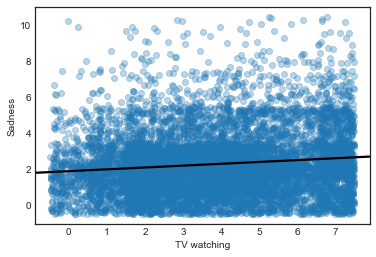

In [16]:
# Reverse-coding the 'happy' variable so that higher scores mean less
# happiness (and thus possibly more sadness).

features['Sadness'] = max(df['happy']) - df['happy']

sns.regplot(
    df['tvtot'],
    features['Sadness'],
    x_jitter=.49,
    y_jitter=.49,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.xlabel('TV watching')
plt.ylabel('Sadness')
plt.show()

In [17]:
# LEVELING THE PLAYING FIELD
# some modeling mehtods assume that all features have values in same range (all features have  min of 0 and max of 1)
# features that vayr in range can result in incorrect estimates
# we can normalize all variables to the same scale (mean 0 and std dev 1)


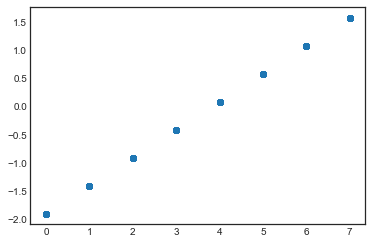

               idno          year         tvtot       ppltrst       pplfair  \
count  8.147000e+03  8.147000e+03  8.147000e+03  8.147000e+03  8.147000e+03   
mean  -4.888824e-19 -2.645920e-15 -7.836428e-16 -7.257574e-15 -6.105886e-16   
std    1.000061e+00  1.000061e+00  1.000061e+00  1.000061e+00  1.000061e+00   
min   -6.364414e-02 -1.000614e+00 -1.900914e+00 -2.516209e+00 -2.832624e+00   
25%   -6.196385e-02 -1.000614e+00 -9.053021e-01 -7.108364e-01 -4.741304e-01   
50%   -6.087847e-02  9.993865e-01  9.031023e-02  1.918499e-01 -2.431735e-03   
75%   -5.925039e-02  9.993865e-01  5.881164e-01  6.431931e-01  9.409657e-01   
max    1.734276e+01  9.993865e-01  1.583729e+00  1.997223e+00  1.884363e+00   

             pplhlp         happy       sclmeet        sclact          gndr  \
count  8.147000e+03  8.147000e+03  8.147000e+03  8.147000e+03  8.147000e+03   
mean  -8.793070e-17  2.377904e-15 -1.101365e-15 -2.058798e-15 -3.414477e-15   
std    1.000061e+00  1.000061e+00  1.000061e+00  1.

In [18]:
# If this is the first time you're using scikit-learn you'll first want to do
# pip install sklearn from your terminal to install the package.
from sklearn import preprocessing

# Select only numeric variables to scale.
df_num = df.select_dtypes(include=[np.number]).dropna()

# Save the column names.
names=df_num.columns

# Scale, then turn the resulting numpy array back into a data frame with the
# correct column names.
df_scaled = pd.DataFrame(preprocessing.scale(df_num), columns=names)

# The new features contain all the information of the old ones, but on a new scale.
plt.scatter(df_num['tvtot'], df_scaled['tvtot'])
plt.show()

# Lookit all those matching means and standard deviations!
print(df_scaled.describe())